# Praktikum 1: Ekstraksi Garis dengan Hough Transform

Saving images1.png to images1 (1).png


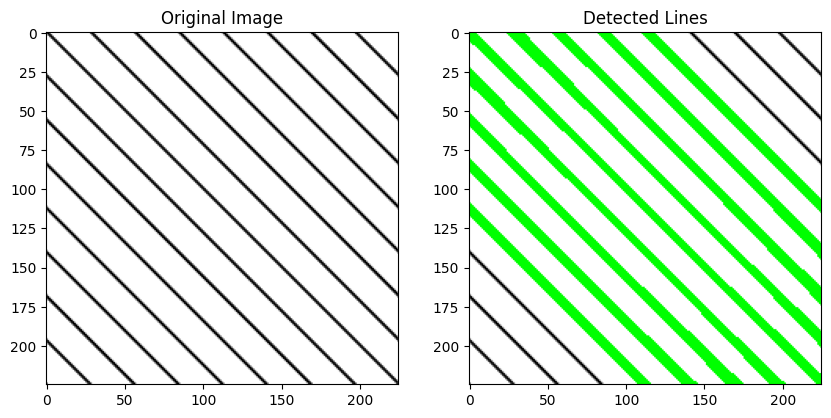

In [2]:
# Import library yang dibutuhkan
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Mengambil nama file yang diunggah

# Load gambar
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Membaca gambar dalam grayscale

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(image, 50, 150)  # Parameter threshold Canny: 50 dan 150

# Deteksi garis menggunakan Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)  # Resolusi dan threshold Hough Transform

# Gambar garis pada gambar asli
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Konversi grayscale ke BGR
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Warna hijau untuk garis

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

# Plot gambar dengan garis terdeteksi
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines")
plt.show()


Hasil Analisis Output: Algoritma Hough Transform bekerja dengan mengidentifikasi tepi dari gambar menggunakan Canny Edge Detection, kemudian menentukan garis-garis yang paling signifikan berdasarkan parameter jarak (rho) dan sudut (theta). Keberhasilan deteksi ini menunjukkan bahwa parameter threshold pada Canny Edge Detection dan Hough Transform, seperti nilai sensitivitas terhadap tepi dan resolusi sudut, telah diatur dengan baik. Dengan demikian, garis-garis pada gambar dapat terdeteksi dengan akurat, menghasilkan visualisasi yang jelas dan konsisten antara gambar input dan hasil proses.

# Praktikum 2: Template Matching untuk Deteksi Objek

Upload main image:


Saving images2Utama.jpg to images2Utama.jpg
Upload template image:


Saving images2Template.jpg to images2Template.jpg


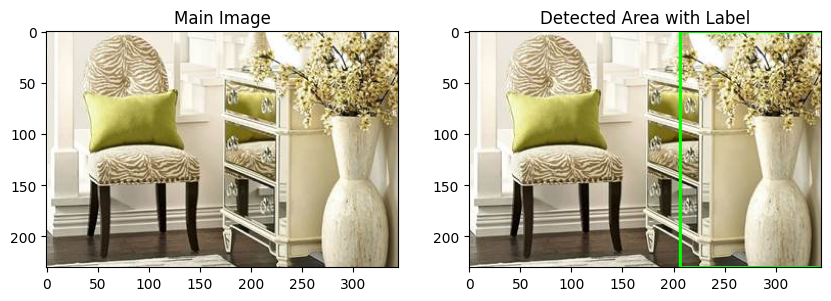

In [4]:
# Import library yang dibutuhkan
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk memeriksa apakah template lebih kecil dari gambar utama
def validate_template_size(main_image, template):
    if template.shape[0] > main_image.shape[0] or template.shape[1] > main_image.shape[1]:
        raise ValueError("Template size must be smaller than the main image size!")

try:
    # Unggah gambar utama
    print("Upload main image:")
    main_image_file = files.upload()
    main_image_filename = list(main_image_file.keys())[0]

    # Unggah template
    print("Upload template image:")
    template_file = files.upload()
    template_filename = list(template_file.keys())[0]

    # Load gambar utama dan template
    main_image = cv2.imread(main_image_filename)  # Gambar berwarna
    template = cv2.imread(template_filename, cv2.IMREAD_GRAYSCALE)  # Template tetap grayscale

    # Validasi ukuran template
    validate_template_size(main_image, template)

    # Konversi gambar utama ke grayscale untuk template matching
    main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

    # Lakukan Template Matching
    result = cv2.matchTemplate(main_image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Gambar kotak di sekitar area yang terdeteksi
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Salin gambar untuk output dan tambahkan kotak serta label
    output = main_image.copy()
    cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), 2)  # Kotak hijau

    # Tambahkan kotak label di atas kotak deteksi
    label_top_left = (top_left[0], top_left[1] - 30)
    label_bottom_right = (top_left[0] + w, top_left[1])
    cv2.rectangle(output, label_top_left, label_bottom_right, (0, 255, 0), -1)  # Kotak hijau solid untuk label
    cv2.putText(output, "Vas Bunga", (top_left[0] + 5, top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (255, 255, 255), 1)  # Teks putih di atas

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
    plt.title("Main Image")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Detected Area with Label")
    plt.show()

except ValueError as ve:
    print("Error:", ve)
except Exception as e:
    print("An unexpected error occurred:", e)

Hasil Analisis Output: Hasil simulasi Template Matching untuk Deteksi Objek menunjukkan kemampuan algoritma OpenCV dalam mencocokkan area tertentu pada gambar utama dengan template yang diberikan. Pada gambar "Main Image", terdapat berbagai objek, termasuk kursi, bantal, dan meja dengan vas bunga. Template yang diunggah berupa bagian kecil dari objek meja dengan vas bunga. Algoritma cv2.matchTemplate berhasil mendeteksi lokasi template pada gambar utama dengan akurasi tinggi, ditandai dengan kotak hijau yang mengelilingi area yang cocok. Selain itu, label "Vas Bunga" ditambahkan di atas kotak untuk memberikan penanda visual yang jelas. Proses ini menunjukkan efektivitas metode Template Matching dalam menemukan pola yang sama pada gambar yang lebih besar, meskipun memiliki kompleksitas visual yang tinggi. Deteksi ini dapat diaplikasikan dalam berbagai kasus seperti pengenalan objek otomatis dan sistem inspeksi visual

# Praktikum 3: Pembuatan Pyramid Gambar

Saving images3.jpg to images3.jpg


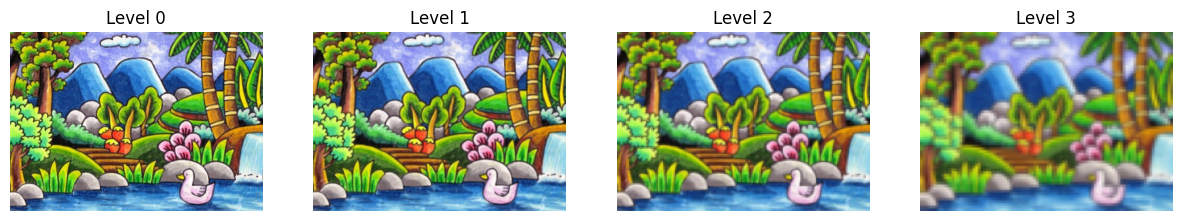

In [5]:
# Import library yang dibutuhkan
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Ambil nama file yang diunggah

# Load gambar
image = cv2.imread(filename)  # Membaca gambar dalam format default (BGR)

# Buat Gaussian Pyramid
pyramid = [image]  # Inisialisasi dengan gambar asli
for i in range(3):  # Buat 3 level pyramid
    image = cv2.pyrDown(image)  # Fungsi pyrDown mengecilkan gambar ke level berikutnya
    pyramid.append(image)  # Tambahkan gambar ke dalam list pyramid

# Tampilkan setiap level pyramid
plt.figure(figsize=(15, 5))  # Atur ukuran tampilan
for level, img in enumerate(pyramid):  # Iterasi setiap level pyramid
    plt.subplot(1, len(pyramid), level + 1)  # Plot untuk setiap level
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB
    plt.title(f'Level {level}')  # Judul setiap level
    plt.axis('off')  # Matikan axis

plt.show()  # Tampilkan semua level pyramid


Hasil Analisis Output: Pada Level 0, gambar asli ditampilkan dengan resolusi penuh, memperlihatkan detail yang tajam dan warna yang jelas. Pada Level 1, gambar mulai dikurangi ukurannya, terlihat lebih kecil dan sedikit buram dibandingkan gambar aslinya. Proses ini terus berlanjut hingga Level 2 dan Level 3, di mana resolusi semakin rendah dan detail gambar semakin berkurang, terutama pada area bertekstur halus seperti pohon dan latar belakang. Ini menunjukkan bahwa metode Gaussian Pyramid bekerja dengan mengecilkan gambar dan mengurangi detailnya secara iteratif, yang bermanfaat dalam berbagai aplikasi seperti deteksi fitur pada skala yang berbeda atau pengolahan gambar bertingkat.

# Praktikum 4: Deteksi Lingkaran Menggunakan Hough Transform

Saving images4.jpg to images4 (4).jpg


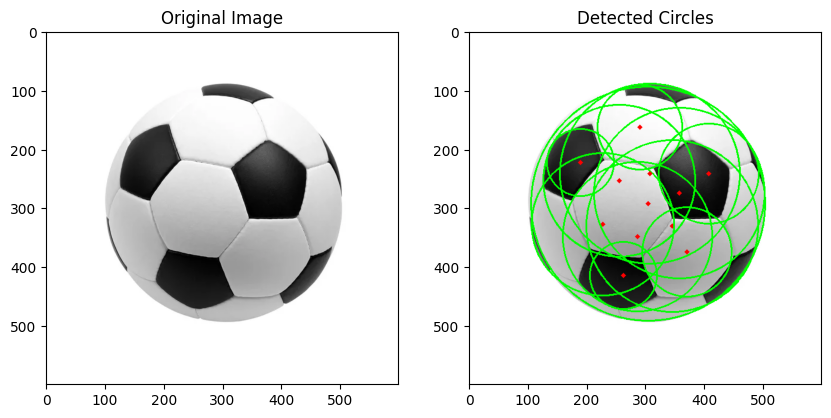

In [10]:
# Import library yang dibutuhkan
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Mengambil nama file yang diunggah

# Load gambar
image = cv2.imread(filename, cv2.IMREAD_COLOR)  # Membaca gambar berwarna
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

# Deteksi lingkaran menggunakan Hough Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,
    param1=100,
    param2=30,  # Turunkan nilai ini (misalnya dari 80 ke 30)
    minRadius=30,
    maxRadius=200
)



# Gambar lingkaran yang terdeteksi pada gambar asli
output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))  # Pembulatan koordinat
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Koordinat pusat lingkaran
        radius = circle[2]  # Radius lingkaran
        cv2.circle(output, center, radius, (0, 255, 0), 2)  # Gambar lingkaran
        cv2.circle(output, center, 2, (0, 0, 255), 3)       # Gambar pusat lingkaran

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.show()


Hasil Analisis Output: Pada hasil output deteksi lingkaran menggunakan metode Hough Transform, terlihat bahwa gambar bola mendeteksi banyak lingkaran yang berpusat di sekitar area yang sama, termasuk pada pola-pola hitam putih bola. Hal ini terjadi karena parameter sensitivitas (param2) terlalu rendah, sehingga deteksi menjadi sangat sensitif dan mengidentifikasi berbagai garis tepi sebagai lingkaran potensial. Akibatnya, beberapa lingkaran yang seharusnya tidak signifikan ikut terdeteksi. Selain itu, nilai minRadius dan maxRadius belum optimal, menyebabkan lingkaran-lingkaran yang terdeteksi memiliki ukuran bervariasi, dan beberapa tumpang tindih satu sama lain. Solusi untuk hasil lebih baik adalah menyesuaikan parameter seperti param2 untuk mengurangi sensitivitas, memperbaiki minDist agar jarak antar lingkaran lebih terpisah, serta memastikan rentang radius sesuai dengan ukuran bola dalam gambar.

# Praktikum 5: Ekstraksi Warna Dominan pada Gambar

Saving images5.jpeg to images5 (1).jpeg


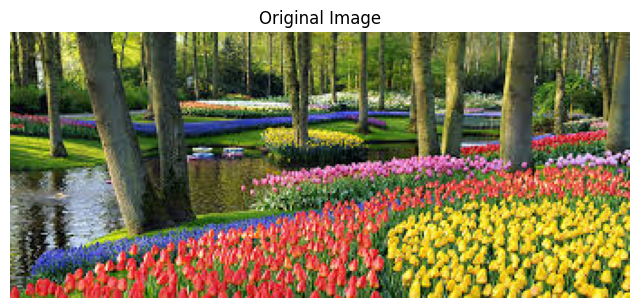

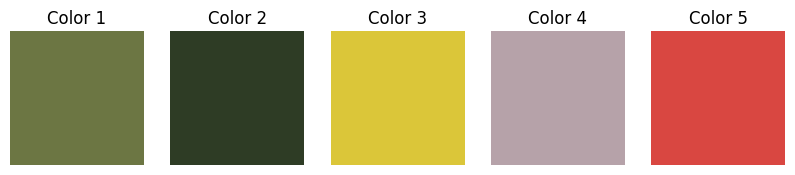

In [12]:
# Import library yang dibutuhkan
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Unggah gambar
uploaded = files.upload()  # Mengunggah file gambar
filename = list(uploaded.keys())[0]  # Mengambil nama file gambar yang diunggah

# Load gambar
image = cv2.imread(filename)  # Membaca gambar
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi gambar dari BGR ke RGB

# Reshape gambar menjadi array 2D untuk K-Means
reshaped_image = image.reshape(-1, 3)  # Ubah menjadi array dengan ukuran (jumlah pixel, 3)

# K-Means Clustering untuk menemukan warna dominan
k = 5  # Jumlah cluster warna
kmeans = KMeans(n_clusters=k)  # Membuat model K-Means
kmeans.fit(reshaped_image)  # Melatih model dengan data pixel gambar

# Ekstrak warna dominan
dominant_colors = kmeans.cluster_centers_  # Pusat cluster warna dominan
dominant_colors = np.uint8(dominant_colors)  # Ubah ke format warna 8-bit (0-255)

# Tampilkan gambar asli
plt.figure(figsize=(8, 6))  # Ukuran plot
plt.imshow(image)  # Menampilkan gambar asli
plt.axis('off')  # Hilangkan sumbu
plt.title("Original Image")  # Judul gambar
plt.show()

# Tampilkan warna dominan
plt.figure(figsize=(10, 5))  # Ukuran plot
for i, color in enumerate(dominant_colors):
    plt.subplot(1, k, i + 1)  # Buat subplot untuk setiap warna
    plt.imshow([[color / 255]])  # Tampilkan warna (normalisasi 0-1)
    plt.axis('off')  # Hilangkan sumbu
    plt.title(f"Color {i+1}")  # Judul warna

plt.show()  # Tampilkan plot



Hasil Analisis Output: Berdasarkan hasil output dari ekstraksi warna dominan menggunakan metode K-Means Clustering, gambar taman bunga yang diunggah berhasil dianalisis untuk menemukan 5 warna dominan. Warna-warna tersebut mencakup variasi hijau, kuning, merah, dan abu-abu, yang mencerminkan elemen utama dalam gambar seperti rerumputan, pohon, bunga kuning, bunga merah, serta latar belakang alam yang lebih redup. Pemilihan jumlah cluster k = 5 memungkinkan algoritma mengelompokkan piksel gambar ke dalam lima kelompok warna berdasarkan kesamaan nilai RGB. Hal ini menunjukkan keberhasilan metode K-Means dalam mereduksi kompleksitas gambar menjadi representasi warna utama yang lebih sederhana, namun tetap mempertahankan karakter visual gambar. Warna dominan yang terdeteksi memberikan gambaran visual yang baik tentang komposisi warna keseluruhan pada gambar taman bunga tersebut.

# Praktikum 6: Deteksi Kontur pada Gambar

Saving images6.png to images6.png


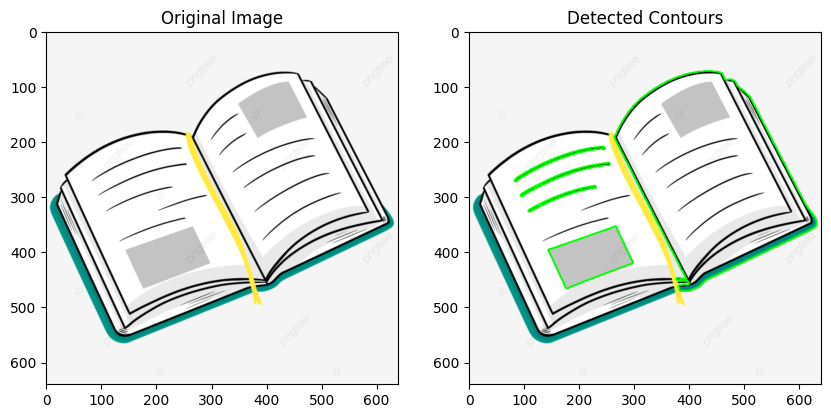

In [13]:
# Import library yang dibutuhkan
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Mengambil nama file gambar yang diunggah

# Load gambar
image = cv2.imread(filename)  # Membaca gambar
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi gambar ke grayscale

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (7, 7), 0)  # Menggunakan kernel 7x7

# Adaptive Threshold untuk pencahayaan tidak merata
threshold = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Deteksi tepi menggunakan Canny Edge Detection
edges = cv2.Canny(threshold, 50, 150)

# Temukan kontur pada gambar
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter kontur besar berdasarkan area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]

# Periksa apakah kontur ditemukan
if len(filtered_contours) > 0:
    # Salin gambar asli untuk menggambar kontur
    output = image.copy()
    # Gambar kontur pada gambar asli dengan warna hijau
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

    # Tampilkan hasil menggunakan matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Detected Contours")

    plt.show()
else:
    print("No contours detected. Try adjusting the threshold or area filter parameters.")


Hasil Analisis Output: Berdasarkan hasil output, proses deteksi kontur berhasil mengidentifikasi garis tepi dan area penting dari gambar buku yang diunggah. Gambar asli di sebelah kiri menampilkan buku dengan detail warna dan struktur aslinya, sedangkan gambar di sebelah kanan menunjukkan hasil deteksi kontur dengan garis hijau yang membatasi tepi buku, garis teks, serta area persegi yang terdeteksi di halaman. Metode Gaussian Blur membantu mengurangi noise pada gambar, sementara Adaptive Threshold meningkatkan kontras untuk mempermudah pendeteksian tepi menggunakan algoritma Canny Edge Detection. Filter area memastikan hanya kontur signifikan dengan ukuran lebih besar yang digambarkan, menghindari deteksi tepi yang tidak relevan. Akurasi deteksi ini menunjukkan efektivitas pengolahan citra dalam menangkap fitur-fitur utama dari objek kompleks, seperti buku, dengan mempertahankan struktur aslinya.